# This notebook computes the probability distribution of Marsquakes location from estimates on both, bearing and epicentral distances
## This example is given with data from Drilleau's paper (doi:[10.1029/2021JE007067](https://doi.org/10.1029/2021JE007067))
### A. Lucas, 2022

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
labels = ['Name', 'offset','offset_err','depth','depth_err','lat','long','BAz','BAz_err']
MEQ = pd.read_csv('MEQ.txt',sep=' ',header=None, names=labels)
display(MEQ)

Name  offset  offset_err  depth  depth_err    lat    long     BAz  \
0   S0154a    29.4         2.8   19.0       37.7   5.40  165.11   87.00   
1   S0173a    29.8         2.0   23.7       16.9   4.80  165.52   88.20   
2   S0185a    54.2         2.9   17.3       10.7  41.76   91.09  319.70   
3   S0235b    29.3         2.2   24.0        8.3  14.18  163.72   69.00   
4   S0325a    40.8         3.2   27.0       13.1 -18.84  169.78  125.50   
5   S0407a    27.9         2.1   33.1       13.7   9.16  163.34   79.00   
6   S0409d    29.6         2.5   22.8        9.2   7.90  165.21   82.00   
7   S0474a    21.1         2.8   29.5       27.5  24.30  143.75   21.00   
8   S0484b    30.4         2.3   25.5       14.4  12.51  165.33   73.00   
9   S0784a    28.6         3.4   19.8        7.6  -1.10  163.70  100.50   
10  S0802a    28.1         2.7   20.9       11.0   6.34  163.79   85.00   
11  S0809a    29.7         2.7   21.2        9.5   5.78  165.41   86.25   
12  S0820a    28.7         3.9   34.0       12.6   6.85  164.37   84.00   
13  S0861a    54.5         3.7   66.6       30.3  37.06   87.52  313.00   
14  S0864a    28.5         3.4   15.2       42.6   4.91  164.21   88.00   
15  S0916d    29.4         2.0   46.7       16.8  13.26  164.09   71.00   
16  S0918a    18.3         3.2   22.9       30.3 -13.05  141.49  161.50   

    BAz_err  
0   55.6000  
1   15.9875  
2   14.3250  
3   18.1300  
4   17.0000  
5   24.5000  
6   58.9000  
7   48.7500  
8   33.7000  
9   17.0250  
10  19.5000  
11  15.2000  
12  17.8500  
13  14.9500  
14  27.0000  
15  25.2500  
16  90.8500

In [3]:
st_long = 135.619641
st_lat = 4.497476
n_run = 1000
nbins = 100

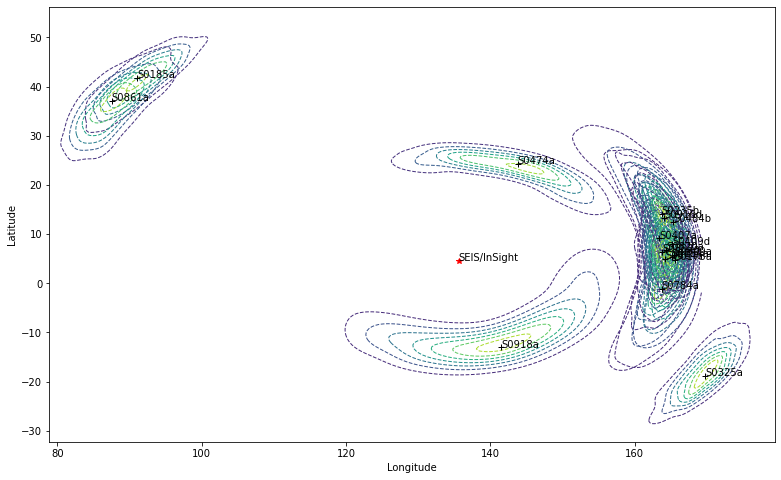

In [4]:
r2d = 180./np.pi
d2r = np.pi/180.

plt.figure(figsize=(13, 8));

la1 = st_lat
lo1 = st_long

for kkkkk in range ((MEQ).shape[0]):
    
    evk = kkkkk; 

    lo2 = []
    la2 = lo2

    la2 = []
    lo2 = []
    
    for k in range(n_run):

            mu = MEQ["offset"][evk]
            sigma = MEQ["offset_err"][evk]/2
            Ad = random.gauss(mu, sigma)
            mu = MEQ["BAz"][evk]
            sigma = MEQ["BAz_err"][evk]/2
            rho = random.gauss(mu, sigma)
            
            la = (np.arcsin(np.sin(la1*d2r) * np.cos(Ad*d2r)  + np.cos(la1*d2r) * np.sin(Ad*d2r) * np.cos(rho*d2r)))*180/np.pi
            la2.append(la)
            lo =  lo1 + (np.arctan2(np.sin(rho*d2r) * np.sin(Ad*d2r) * np.cos(la1*d2r) , np.cos(Ad*d2r) - np.sin(la1*d2r) * np.sin(la*d2r)))*r2d
            lo2.append(lo)
            
           
    xmin = np.min(lo2)
    xmax = np.max(lo2)
    ymin = np.min(la2)
    ymax = np.max(la2)
    data =  np.column_stack((lo2, la2))    ;    
    k = gaussian_kde(data.T)
    xi, yi = np.mgrid[xmin:xmax:nbins*1j, ymin:ymax:nbins*1j];
    zi = k(np.vstack([xi.flatten(), yi.flatten()]));

    plt.contour(xi, yi, zi.reshape(xi.shape), linewidths=1, linestyles='dashed', cmap='viridis')
     
    plt.plot(MEQ["long"][evk],MEQ["lat"][evk],'+k');
    plt.text(MEQ["long"][evk],MEQ["lat"][evk],MEQ["Name"][evk]);

plt.text(st_long,st_lat,'SEIS/InSight');
plt.plot(st_long,st_lat,'*r');
plt.xlabel('Longitude');
plt.ylabel('Latitude');